In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline

# CMSE 381, Fundamental Data Science Methods
## Homework 5, Fall 2025

**Name:** Monis, Lowell

---

### Question 1: Subset selection problem

Below are the training and testing error from doing linear regression on different subsets of the variables from the `auto` data set to predict `mpg`.

| Variables                                    | Train Score | Test Score |
|----------------------------------------------|-------------|------------|
| null model                                   | 60.76       | 60.73      |
| (cylinders,)                                 | 24.02       | 24.15      |
| (horsepower,)                                | 23.94       | 24.19      |
| (weight,)                                    | 18.68       | 18.84      |
| (acceleration,)                              | 49.87       | 50.26      |
| (cylinders, horsepower)                      | 20.85       | 21.13      |
| (cylinders, weight)                          | 18.38       | 18.55      |
| (cylinders, acceleration)                    | 23.94       | 24.38      |
| (horsepower, weight)                         | 17.84       | 18.03      |
| (horsepower, acceleration)                   | 22.46       | 22.70      |
| (weight, acceleration)                       | 18.25       | 18.61      |
| (cylinders, horsepower, weight)              | 17.76       | 17.99      |
| (cylinders, horsepower, acceleration)        | 20.06       | 20.44      |
| (cylinders, weight, acceleration)            | 18.13       | 18.54      |
| (horsepower, weight, acceleration)           | 17.84       | 18.16      |
| (cylinders, horsepower, weight, acceleration)| 17.76       | 18.13      |

Do the following for each of the three subset selection methods discussed in class:

- Describe the steps taken in the algorithm to arrive at a conclusion for the best possible model.
- Be sure to say what $\mathcal{M}_k$ is for $k=0,1,\dots,4$.
- What is the best model returned by the algorithm? Give the full equation for `mpg` in terms of the variables, although you don't know the learned coefficients so those can be left in terms of $\hat\beta_i$.
- How many models do you have to train to arrive at the conclusion?

#### (a) Best subset selection

The predictor space can be written as $\mathcal{P}=\{\text{cylinders},\text{horsepower},\text{weight},\text{acceleration}\}$. $p=4$

Best subset selection finds the optimal subset of predictors for each size $k$. The steps are as follows as per ISLP Algorithm $\S$ 6.1:

1. Let $\mathcal{M}_0$ denote the null model, which contains no predictors. This model essentially predicts the sample mean for each observation.
2. For $k=1,2,\dots,p$:
   - Fit all $p\choose k$ models that contain exactly $k$ predictors.
   - Pick the best among these $p\choose k$ models, and call it $\mathcal{M}_k$. Here, best is defined as having the smallest residual sum of squares, or the largest $R^2$.
3. Now, we can select a single best model from $\mathcal{M}_k, k\in [p]$ using the prediction error on a validation set, thus a test error, or the adjusted $R^2$, depending on what's available. Cross-validation can also be used.

The null model $\mathcal{M}_0$ has a training error of 60.76. We can now proceed with identifying the rest of $\mathcal{M}_k$. Since we have been given all the possible models and their training and testing errors, we do not have to train individual models and determine the different possibilities.

For $k=1$, there are ${4\choose1} = 4$ possible models to choose from. The best performing model $\mathcal{M}_1$ is the one with the least training error at 18.68, (weight,).

For $k=2$, there are ${4\choose2} =6$ possible models to choose from. The best performing model $\mathcal{M}_2$ is the one with the least training error at 17.84, (horsepower, weight).

For $k=3$, there are ${4\choose3}=4$ possible models to choose from. The best performing model $\mathcal{M}_3$ is the one with the least training error at 17.76, (cylinders, horsepower, weight).

For $k=4$, there are ${4\choose4}=1$ possible model to choose from. The only model $\mathcal{M}_4$ is (cylinders, horsepower, weight, acceleration), at training error 17.76.

Now, we can gauge the best model between $\mathcal{M}_k$, $k\in [p]$, by comparing their respective test errors.

|$k$| Best Model $\mathcal{M}_k$                   | Train Score | Test Score |
|---|----------------------------------------------|-------------|------------|
| 0 | null model                                   | 60.76       | 60.73      |
| 1 | (weight,)                                    | 18.68       | 18.84      |
| 2 | (horsepower, weight)                         | 17.84       | 18.03      |
| 3 | (cylinders, horsepower, weight)              | 17.76       | 17.99      |
| 4 | (cylinders, horsepower, weight, acceleration)| 17.76       | 18.13      |

From the above comparison, it looks like the lowest validation/test score (17.99) is associated with $\mathcal{M}_3$, which is trained using (cylinders, horsepower, weight).

Thus, based on test score, the best model is $\mathcal{M}_3$ (cylinders, horsepower, weight). The model can be written as:

$$\mathrm{mpg} = \beta_0+\beta_1(\mathrm{cylinders})+\beta_2(\mathrm{horsepower})+\beta_3(\mathrm{weight})$$

While a quick count from the above deduction can inform us of the number of models trained, the textbook gives us a formula, $2^p$, to calculate the number of models that need to be trained for best subset selection. Thus, for this data, best subset selection needs us to train $2^4=16$ models.

#### (b) Forward selection

Forward stepwise selection finds the optimal subset of predictors by adding a new variable depending on its effect on the error. The steps are as follows as per ISLP Algorithm $\S$ 6.2:

1. Let $\mathcal{M}_0$ denote the null model, which contains no predictors.
2. For $k=0,2,\dots,p-1$:
   - Consider all $p-k$ models that augment the predictors in $\mathcal{M}_k$ with one additional predictor.
   - Choose the best among these $p-k$ models, and call it $\mathcal{M}_{k+1}$. Here best is defined as having smallest RSS or highest $R^2$.
3. Now, we can select a single best model from $\mathcal{M}_k, k\in [p]$ using the prediction error on a validation set, thus a test error, or the adjusted $R^2$, depending on what's available. Cross-validation can also be used.

The algorithm uses the training error to determine which predictor to add at each step. $p=4$ predictors are available from the predictor space $\mathcal{P}$. We initiate the algorithm with $\mathcal{M}_0$, the null model.

For $k=0$, the current model is $\mathcal{M}_0$. There are $p-k=4-0=4$ predictors remaining. The lowest error is from adding weight, at 18.68, resulting in the model (weight,), which is now $\mathcal{M}_1$.

For $k=1$, the current model is $\mathcal{M}_1$ (weight,). There are $p-k=4-1=3$ predictors remaining, which are cylinders, horsepower, and acceleration. The lowest error is when we add horsepower, at 17.84, resulting in the model (weight, horsepower), which is now $\mathcal{M}_2$.

For $k=2$, the current model is $\mathcal{M}_2$ (weight, horsepower). There are $p-k=4-2=2$ predictors remaining, which are cylinders and acceleration. The lowest error is when we add cylinders, at 17.76, resulting in the model (weight, horsepower, cylinders), which is now $\mathcal{M}_3$.

For $k=4$, the current model is $\mathcal{M}_3$ (weight, horsepower, cylinders). There is $p-k=4-3=1$ predictor remaining, which is acceleration, which we can add directly, resulting in the model (weight, horsepower, cylinders, acceleration), which is now $\mathcal{M}_4$, having a training error of 17.76.

Now, we can gauge the best model between $\mathcal{M}_k$, $k\in [p]$, by comparing their respective test errors.

|$k$| Best Model $\mathcal{M}_k$                   | Train Score | Test Score |
|---|----------------------------------------------|-------------|------------|
| 0 | null model                                   | 60.76       | 60.73      |
| 1 | (weight,)                                    | 18.68       | 18.84      |
| 2 | (horsepower, weight)                         | 17.84       | 18.03      |
| 3 | (cylinders, horsepower, weight)              | 17.76       | 17.99      |
| 4 | (cylinders, horsepower, weight, acceleration)| 17.76       | 18.13      |

From the above comparison, it looks like the lowest validation/test score (17.99) is associated with $\mathcal{M}_3$, which is trained using (cylinders, horsepower, weight).

Thus, based on test score, the best model is $\mathcal{M}_3$ (cylinders, horsepower, weight). The model can be written as:

$$\mathrm{mpg} = \beta_0+\beta_1(\mathrm{cylinders})+\beta_2(\mathrm{horsepower})+\beta_3(\mathrm{weight})$$

While a quick count from the above deduction can inform us of the number of models trained, the textbook gives us a formula, $1+\frac{p(p+1)}{2}$, to calculate the number of models that need to be trained for best subset selection. Thus, for this data, best subset selection needs us to train $1+\frac{4(4+1)}{2}=1+\frac{20}{2}=11$ models.

#### (c) Backward selection

Backward stepwise selection finds the optimal subset of predictors by removing a variable depending on its effect on the error value. The steps are as follows as per ISLP Algorithm $\S$ 6.3:

1. Let $\mathcal{M}_p$ denote the full model, containing all $p$ predictors.
2. For $k=p,p-1,\dots,1$:
   - Consider all $k$ models that contain all but one of the predictors in $\mathcal{M}_k$, for a total of $k-1$ predictors.
   - Choose the best among these $k$ models and call it $\mathcal{M}_{k-1}$. Here best is defined as having smallest RSS or highest $R^2$.
3. Now, we can select a single best model from $\mathcal{M}_k, k\in [p]$ using the prediction error on a validation set, thus a test error, or the adjusted $R^2$, depending on what's available. Cross-validation can also be used.

The algorithm uses the training error to determine which predictor to add at each step. $p=4$ predictors are available from the predictor space $\mathcal{P}$. We initiate the algorithm with $\mathcal{M}_0$, the null model.

For $k=4$, the current model is $\mathcal{M}_4$ (cylinders, horsepower, weight, acceleration). We try removing each of the variables and check for the effect on the training error. When we remove acceleration, the error has the most favorable change--it remains the same at 17.76, and does not increase, as is the case for the rest of the predictors. Thus, the model evolves to $\mathcal{M}_3$ (cylinders, horsepower, weight).

For $k=3$, the current model is $\mathcal{M}_3$ (cylinders, horsepower, weight). We try removing each of the remaining variables and check for the effect on the training error. When we remove cylinders, the error has the most favorable change--it increases the least, from 17.76 to 17.84. Thus, the model evolves to $\mathcal{M}_2$ (horsepower, weight).

For $k=2$, the current model is $\mathcal{M}_2$ (horsepower, weight). We try removing each of the remaining variables and check for the effect on the training error. When we remove horsepower, the error has the most favorable change--it increases the least, from 17.84 to 18.68. Thus, the model evolves to $\mathcal{M}_1$ (weight,).

For $k=1$, the current model is $\mathcal{M}_1$ (weight,). We remove the last variable to evolve the model to the null model $\mathcal{M}_0$, which has a training error of 60.76.

Now, we can gauge the best model between $\mathcal{M}_k$, $k\in [p]$, by comparing their respective test errors.

|$k$| Best Model $\mathcal{M}_k$                   | Train Score | Test Score |
|---|----------------------------------------------|-------------|------------|
| 0 | null model                                   | 60.76       | 60.73      |
| 1 | (weight,)                                    | 18.68       | 18.84      |
| 2 | (horsepower, weight)                         | 17.84       | 18.03      |
| 3 | (cylinders, horsepower, weight)              | 17.76       | 17.99      |
| 4 | (cylinders, horsepower, weight, acceleration)| 17.76       | 18.13      |

From the above comparison, once again, it looks like the lowest validation/test score (17.99) is associated with $\mathcal{M}_3$, which is trained using (cylinders, horsepower, weight).

Thus, based on test score, the best model is $\mathcal{M}_3$ (cylinders, horsepower, weight). The model can be written as:

$$\mathrm{mpg} = \beta_0+\beta_1(\mathrm{cylinders})+\beta_2(\mathrm{horsepower})+\beta_3(\mathrm{weight})$$

While a quick count from the above deduction can inform us of the number of models trained, the textbook gives us a formula, $1+\frac{p(p+1)}{2}$, to calculate the number of models that need to be trained for best subset selection. Thus, for this data, best subset selection needs us to train $1+\frac{4(4+1)}{2}=1+\frac{20}{2}=11$ models.

#### (d) Are your answers to (a), (b), and (c) the same? Do we expect them to be?

My answers to all three methods of subset selection conducted in this study are the same. However, we cannot expect them to be the same all the time.

The best model selected by all three methods ($\mathcal{M}_3$), which is trained using variables `cylinders`, `horsepower`, and `weight` from the `mpg` data set. The model generates a test error of 17.99.

The three methods are never expected to yield the same best model all the time. Best subset selection is guaranteed to find the absolute best model with the lowest training error, which needs it to train all possible models, increasing its computational cost. Stepwise selections use greedy search strategies. All possible models are not examined, but rather a subset of models based on the previous step's choice are chosen. It is possible that the small number of predictors in this case led to us getting the same response for all three methods. This is not always the case since stepwise methods follow an irreversible, myopic path, and they may overlook the overall best model if it is not along their particular search path.

### Question 2: ISLP $\S$ 6.6.9

A selection of the sub-problems in this question are to be completed. For each of the parts (c), (d), and (e), provide an additional plot showing the test error for either the potential $\lambda$ (a.k.a. $\alpha$) values for ridge/lasso or the potential dimension $M$ for PCR to justify the choice.

In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

I first preprocess the data as recommended in previous chapters of ISLP. It looks like I need to do one-hot encoding for the variable `Private`.

In [2]:
data=pd.read_csv('../data/College.csv').rename({'Unnamed: 0': 'College'}, axis=1).set_index('College')
data['Private'] = [1 if x == 'Yes' else 0 for x in data['Private']]
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
data.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

#### (a) Split the data into a training set and a test set.

We will be doing a default train-test split on this data, using the seed `381`.

In [5]:
X = sm.add_constant(data.iloc[:, [0]+list(range(2,data.shape[1]))])
y = data['Apps']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=381)

#### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [6]:
model=sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     414.8
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          1.77e-305
Time:                        21:00:38   Log-Likelihood:                -4900.9
No. Observations:                 582   AIC:                             9838.
Df Residuals:                     564   BIC:                             9916.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -378.4851    503.356     -0.752      0.452   -1367.167     610.197
Private      -593.5154    172.920     -3.432      0.001    -933.160    -253.870
Accept          1.5869      0.047     33.968      0.000       1.495       1.679
Enroll         -0.7328      0.231     -3.177      0.002      -1.186      -0.280
Top10perc      58.7022      6.653      8.823      0.000      45.634      71.771
Top25perc     -18.4695      5.334     -3.463      0.001     -28.946      -7.993
F.Undergrad     0.0139      0.042      0.330      0.741      -0.069       0.096
P.Undergrad     0.0687      0.038      1.790      0.074      -0.007       0.144
Outstate       -0.0833      0.023     -3.593      0.000      -0.129      -0.038
Room.Board      0.1847      0.060      3.087      0.002       0.067       0.302
Books          -0.0321      0.279     -0.115      0.908      -0.580       0.516
Personal        0.0486      0.075      0.652      0.515      -0.098       0.195
PhD            -6.3530      5.676     -1.119      0.264     -17.502       4.796
Terminal       -5.3529      6.394     -0.837      0.403     -17.911       7.205
S.F.Ratio      10.5306     15.887      0.663      0.508     -20.674      41.735
perc.alumni    -0.4081      5.146     -0.079      0.937     -10.515       9.699
Expend          0.0681      0.014      4.757      0.000       0.040       0.096
Grad.Rate       9.3386      3.641      2.565      0.011       2.188      16.489
==============================================================================
Omnibus:                      341.608   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5534.627
Skew:                           2.250   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                     1.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I am using the mean squared error to calculate the test error for this model, which is given as follows:

In [7]:
mean_squared_error(y_test, model.predict(X_test))

665249.6845421843

In [8]:
r2_score(y_test, model.predict(X_test))

0.9392250767406248

#### (c)  Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

First, I normalize the data set.

In [9]:
transformer = StandardScaler().fit(X_train).set_output(transform = 'pandas')
X_tr_norm = transformer.transform(X_train).drop(['const'],axis=1)
X_te_norm = transformer.transform(X_test).drop(['const'],axis=1)

I will be using Leave-One-Out Cross Validation to determine the best value of $\lambda$, or in this case $\alpha$. We create a wide range of potential values and then run a cross-validation ridge regression model. We exclude 0.

In [10]:
alphas = 10**np.linspace(4,-2,100)*0.5
alphas_cv = alphas[alphas>0]
ridgecv = RidgeCV(alphas = alphas_cv, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_tr_norm, y_train)
alpha = ridgecv.alpha_
print(alpha)

0.005


The optimal value for $\lambda$ is $0.005$ as determined by this cross-validation. I can now proceed with calculating the test MSE.

In [11]:
mean_squared_error(y_test, ridgecv.predict(X_te_norm))

665246.4290323145

In [12]:
r2_score(y_test, ridgecv.predict(X_te_norm))

0.9392253741528103

I will now loop through all the potential $\lambda$ values and plot the associated test error to justify my choice of $\lambda$. I plot a marker for the $\lambda$ value associated with the lowest test MSE, along with the chosen $\lambda=0.005$ via cross-validation. 

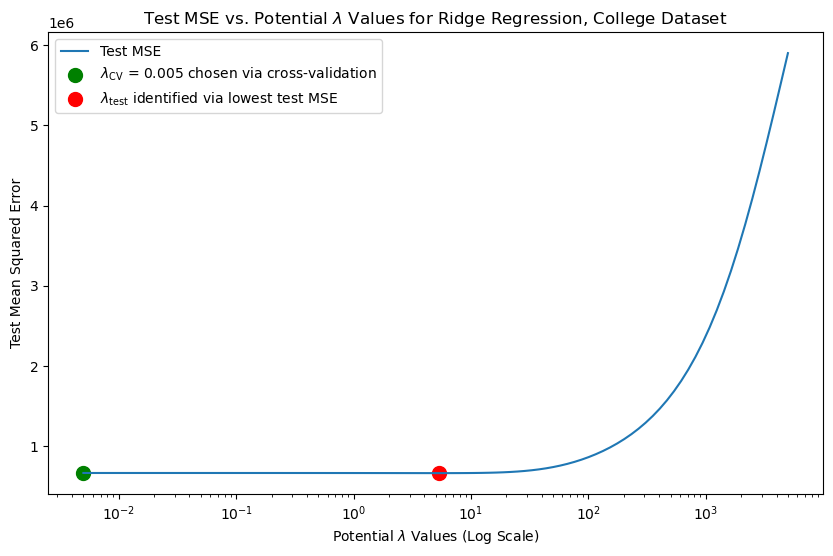

In [13]:
errors = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_tr_norm, y_train)
    test_error = mean_squared_error(y_test, ridge.predict(X_te_norm))
    errors.append(test_error)
plt.figure(figsize=(10, 6))
plt.plot(alphas, errors, label='Test MSE')
plt.scatter(alpha, mean_squared_error(y_test, ridgecv.predict(X_te_norm)),
            color='green', marker='o', s=100, label=f'$\\lambda_\\text{{CV}}$ = {alpha} chosen via cross-validation')
plt.scatter(alphas[np.argmin(errors)], errors[np.argmin(errors)],
            color='red', marker='o', s=100, label='$\\lambda_\\text{test}$ identified via lowest test MSE')
plt.title('Test MSE vs. Potential $\\lambda$ Values for Ridge Regression, College Dataset')
plt.xlabel('Potential $\\lambda$ Values (Log Scale)')
plt.ylabel('Test Mean Squared Error')
ax=plt.gca()
ax.set_xscale('log')
plt.legend()
plt.show()

Clearly,  $\lambda=0.005$ is a good value for the regularization parameter, since it is associated with very low test error. When test MSE is used as a metric, $\lambda$ values of order between 0 and 1 also provide low error, as observed on the above plot.

#### (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

I can reuse the normalized data from part (c). Since `LassoCV()` automatically finds good choices of the regularization parameter for you, I will not be passing a list `alphas` to the method. I will reuse that array later for justifying my choice via a plot. The `LassoCV()` method uses a 5-fold cross-validation by default.

In [14]:
lassocv = LassoCV(random_state=381).fit(X_tr_norm, y_train)
alpha = lassocv.alpha_
print(alpha)

17.598043523672352


The optimal value for $\lambda$ is $17.598$ as determined by this cross-validation. I can now proceed with calculating the test MSE.

In [15]:
mean_squared_error(y_test, lassocv.predict(X_te_norm))

643492.5095449584

In [16]:
r2_score(y_test, lassocv.predict(X_te_norm))

0.9412127374213017

I will now count the number of non-zero coefficients.

In [17]:
print(np.sum(np.abs(lassocv.coef_) > 0))

15


There are 15 non-zero coefficients.

I will now loop through all the potential $\lambda$ values and plot the associated test error to justify my choice of $\lambda$. I plot a marker for the $\lambda$ value associated with the lowest test MSE, and check if it matches $\lambda=17.598$.

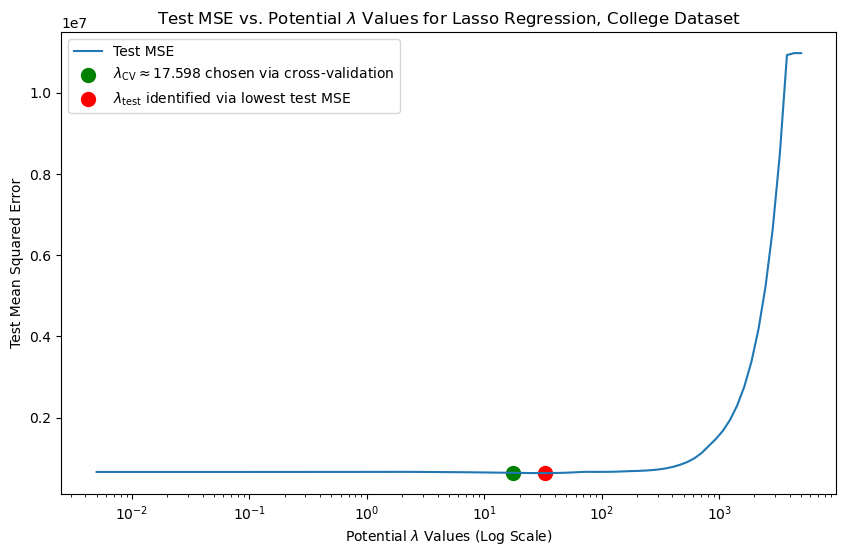

In [18]:
coefs = []
errors = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_tr_norm, y_train)
    test_error = mean_squared_error(y_test, lasso.predict(X_te_norm))
    coefs.append(lasso.coef_)
    errors.append(test_error)
plt.figure(figsize=(10, 6))
plt.plot(alphas, errors, label='Test MSE')
plt.scatter(alpha, mean_squared_error(y_test, lassocv.predict(X_te_norm)),
            color='green', marker='o', s=100, label=f'$\\lambda_\\text{{CV}} \\approx${alpha:.3f} chosen via cross-validation')
plt.scatter(alphas[np.argmin(errors)], errors[np.argmin(errors)],
            color='red', marker='o', s=100, label='$\\lambda_\\text{test}$ identified via lowest test MSE')
plt.title('Test MSE vs. Potential $\\lambda$ Values for Lasso Regression, College Dataset')
plt.xlabel('Potential $\\lambda$ Values (Log Scale)')
plt.ylabel('Test Mean Squared Error')
ax=plt.gca()
ax.set_xscale('log')
plt.legend()
plt.show()

Clearly,  $\lambda=17.598$ is a good value for the regularization parameter, since it is associated with very low test error. When test MSE is used as a metric, $\lambda$ values of order between 1 and 2 also provide low error, as observed on the above plot.

Now, I will create a plot of the number of non-zero coefficients  as a function of  the choice of $\lambda$ values

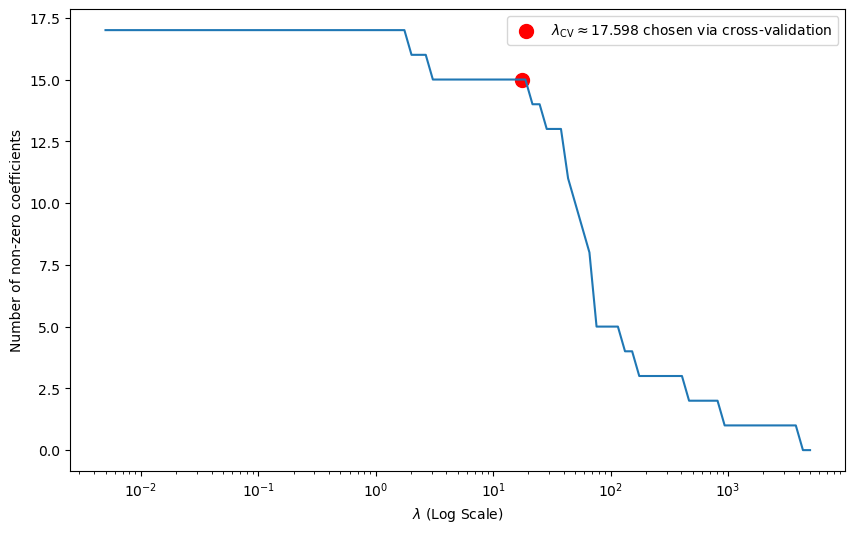

In [19]:
non_zero_counts = np.count_nonzero(coefs, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(alphas, non_zero_counts)
plt.scatter(alpha, np.sum(np.abs(lassocv.coef_) > 0),
           color='red', marker='o', s=100, label=f'$\\lambda_\\text{{CV}} \\approx${alpha:.3f} chosen via cross-validation')
plt.xscale('log')
plt.legend()
plt.xlabel('$\\lambda$ (Log Scale)')
plt.ylabel('Number of non-zero coefficients')
plt.show()

The above plot verifies the model's claim that there are 15 non-zero coefficients for the associated optimal $\lambda$ value.

#### (e) Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

First, I will create a PCA object and fit it with scaled data. I will also create a linear regression object. After this, I will train the linear regression model for each value of $M$ and compute the 10-fold CV error, as well as the test error. Below are the optimal value of $M$, the minimal cross-validation error, and the test error obtained for the optimal value of $M$. I have also created a plot showing the cumulative explained variance ratio.

Optimal number of principal components using 10-fold CV: 17
Minimal cross-validation error associated with 17 PCs: 1624553.076487689
Test MSE for M=17: 665249.6845430702


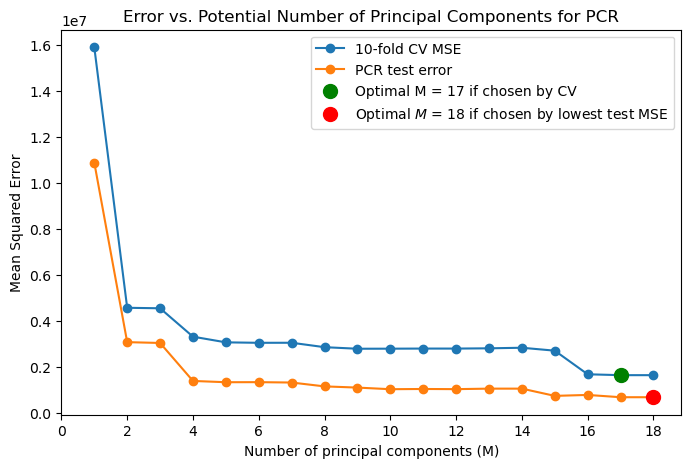

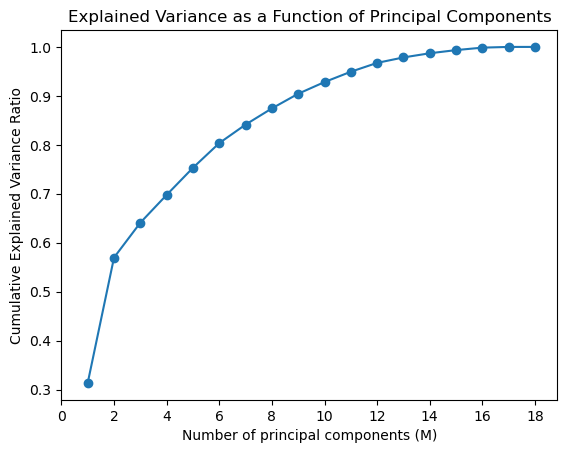

In [23]:
cv_mse = []
errors = []
for M in range(1, X_train.shape[1] + 1):
    model = make_pipeline(StandardScaler(), PCA(n_components=M), LinearRegression())
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_mse.append(-scores.mean())
    model.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, model.predict(X_test)))
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
pca_full = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
M_opt = np.argmin(cv_mse) + 1
min_cv_mse = cv_mse[M_opt - 1]
print("Optimal number of principal components using 10-fold CV:", M_opt)
print("Minimal cross-validation error associated with", M_opt, "PCs:", min_cv_mse)
print("Test MSE for M=", M_opt,": ", errors[M_opt-1], sep="")

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, X_train.shape[1] + 1), cv_mse, '-o', zorder=0, label='10-fold CV MSE')
plt.plot(np.arange(1, X_train.shape[1] + 1), errors, '-o', label='PCR test error')
plt.scatter(M_opt, min_cv_mse,
            color='green', marker='o', label=f'Optimal M = {M_opt} if chosen by CV', zorder=2, s=100)
plt.scatter(np.argmin(errors) + 1, errors[np.argmin(errors)],
            color='red', marker='o', s=100,
            label=f'Optimal $M$ = {np.argmin(errors)+1} if chosen by lowest test MSE', zorder=2)
plt.xlabel('Number of principal components (M)')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Potential Number of Principal Components for PCR')
plt.xticks(np.arange(0, X_train.shape[1] + 1,2))
plt.legend()
plt.show()
plt.plot(np.arange(1, X_train.shape[1] + 1), cumulative_variance, '-o')
plt.xlabel('Number of principal components (M)')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance as a Function of Principal Components')
plt.xticks(np.arange(0, X_train.shape[1] + 1,2))
plt.show()

The reason I have added all these extra elements to the plots is to show that while the question asks for the optimal $M$ _chosen by cross-validation_, it is always better to use the $M$ value after which there is only marginal decline in error, or the $M$ value where 90% of variance is explained. The goal of PCA is dimension reduction, and the optimal value $M=17$ chosen by cross-validation does not reduce the dimensions of the data at all. So while the question is asking me to provide the optimal value by cross-validation, if I were to do my own analysis, I would probably choose a value between 4 and 8, since after 4, there is very marginal change in error (changes are smaller after 8), and 90% of variance is explained at 8 principal components.

I will now recreate the PCR model for $M=17$ and calculate the error as a sanity check.

In [21]:
pcr_model = make_pipeline(StandardScaler(), PCA(n_components=M_opt), LinearRegression())
pcr_model.fit(X_train, y_train)
mean_squared_error(y_test, pcr_model.predict(X_test))

665249.6845430702

In [22]:
r2_score(y_test, pcr_model.predict(X_test))

0.9392250767405439

#### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

I have created a table for the error values associated with the most optimal selections of the hyperparameter of each model.

| Model                   | Tuning parameter | Test MSE      | $R^2$  | Notes                                            |
| ----------------------- | ---------------- | ------------- | ------ | ------------------------------------------------ |
| OLS                     | –                | 665249.68     | 0.9392 | Baseline model with 18 predictors                |
| Ridge Regression        | $\lambda=0.005$  | 665246.43     | 0.9392 | Nearly identical to OLS due to less shrinkage    |
| Lasso Regression        | $\lambda=17.598$ | **643492.51** | 0.9412 | 3 predictors removed, 15 non-zero coefficients   |
| PCR                     | $M=17$           | 665249.68     | 0.9392 | Same as OLS (no effective dimension reduction)   |

The test mean squared errors for the four models (OLS, ridge regression, lasso regression, and PCR) are all very similar, ranging from approximately 643000 to 665000. The ridge and PCR models perform almost identically to OLS, suggesting that multicollinearity and overfitting are not major concerns while the model generalizes. The lasso model achieves a slightly lower test error, implying that excluding some predictors may marginally improve generalization. Overall, the differences in predictive performance among the methods are small, and all capture roughly the same underlying linear relationships in the data. All models achieve an $R^2$ around 0.94, meaning they explain roughly 94% of the variance in the number of college applications received. Linear relationships capture most of the predictive signal. The lasso provides a marginal improvement while also performing feature selection, making it arguably the most efficient model. Differences in test error are minimal, so model choice could depend more on interpretability or simplicity than predictive gains, like a choice of lower $M$ in PCR.

The models show that the number of college applications can be predicted with high accuracy, but that must be taken with a grain of salt due to the significant test MSE. Differences among OLS, Ridge, and PCR are negligible, suggesting that regularization and dimension reduction offer little improvement for this dataset. The lasso model achieves the best performance with fewer predictors, indicating some redundancy among variables. Overall, the models generalize well and capture most of the variance in the response variable.